In [ ]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Download uncleaned data
BTVpolice = pd.read_csv('data/BTVpolice.csv')

In [ ]:
BTVpolice_cleaned = BTVpolice.replace('NA', pd.NA).dropna()

BTVpolice_cleaned.to_csv('data/BTVpolice_cleaned.csv', index=False)


In [ ]:

day_of_week_counts = BTVpolice['DayOfWeek'].value_counts()
day_of_month_counts = BTVpolice['Month'].value_counts()

print("Counts by Day of the Week:")
print(day_of_week_counts)
print("\nCounts by Day of the Month:")
print(day_of_month_counts)


Counts by Day of the Week:
DayOfWeek
Friday       9968
Wednesday    9124
Thursday     9124
Tuesday      8910
Monday       8699
Saturday     7929
Sunday       7115
Name: count, dtype: int64

Counts by Day of the Month:
Month
August       7393
July         6231
June         5690
September    5684
May          5430
October      5218
April        4726
November     4424
March        4189
December     4171
January      3990
February     3723
Name: count, dtype: int64


In [ ]:

BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'])

BTVpolice['date'] = BTVpolice['call_time'].dt.date

calls_per_day = BTVpolice.groupby('date').size()

mean_calls = calls_per_day.mean()
std_calls = calls_per_day.std()
outliers = calls_per_day[calls_per_day > (mean_calls + 2 * std_calls)]

print(outliers)


date
2023-07-03    129
2023-07-12    148
2023-07-14    155
2023-07-17    139
2023-07-19    150
2023-07-20    147
2023-07-21    147
2023-07-28    148
2023-08-10    125
2023-09-01    131
2023-09-05    128
2023-09-06    133
2023-09-07    154
2023-09-08    151
2023-09-15    128
2023-09-22    125
2023-10-05    132
2023-10-06    133
2023-10-13    139
2023-10-19    137
2023-10-28    137
2024-05-20    128
2024-06-06    132
2024-08-07    126
2024-08-14    137
dtype: int64


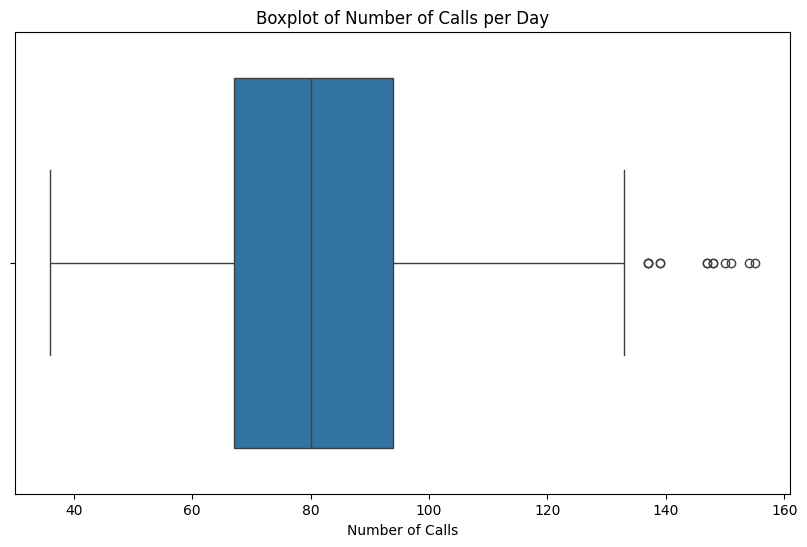

In [ ]:

BTVpolice['call_time'] = pd.to_datetime(BTVpolice['call_time'])
BTVpolice['date'] = BTVpolice['call_time'].dt.date

calls_per_day = BTVpolice.groupby('date').size().reset_index(name='num_calls')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=calls_per_day['num_calls'])
plt.title('Boxplot of Number of Calls per Day')
plt.xlabel('Number of Calls')
plt.show()
